In [71]:
%load_ext autoreload 
%autoreload 2
from utils import load_data, load_excel_sheets, plot_distribution_bar, extract_gender_from_zippia
from config import PARSED_DATA_PATH, CANDIDATE_CVS_PATH, REVERSE_MATCHING_PATH, JOB_LINKS
from gender_analysis import get_category_distribution, get_skill_distribution_by_gender, get_skill_gender_share,plot_gender_bias_skills_bar, get_skilltype_gender_share, add_zippia_columns
import polars as pl 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'add_zippia_columns' from 'gender_analysis' (/Users/francescobaiocchi/Desktop/AI&ETHICS/gender_analysis.py)

In [40]:
cv_skills = load_data(PARSED_DATA_PATH)
dfs = load_excel_sheets(REVERSE_MATCHING_PATH, ["Candidates"])

In [41]:
df_skills_with_gender = cv_skills.join(dfs["Candidates"].select(["CANDIDATE_ID", "Gender"]), 
                    left_on="CANDIDATE_ID", 
                    right_on="CANDIDATE_ID", 
                    how="inner")

In [42]:
df_skills_with_gender

CANDIDATE_ID,Skill,Skill_Type,Gender
i64,str,str,str
7990324,"""Computer Literacy""","""IT_Skill""","""Female"""
7990324,"""Dental Assistant (m/f)""","""Job_title""","""Female"""
7990324,"""General Labourer (other) (m/f)""","""Job_title""","""Female"""
7990324,"""Intern (m/f)""","""Job_title""","""Female"""
7990324,"""Italian""","""Language_Skill""","""Female"""
…,…,…,…
18233,"""Knowledge of Finance""","""Professional_Skill""","""Female"""
18233,"""Maintenance""","""Professional_Skill""","""Female"""
18233,"""Multi-Level Marketing""","""Professional_Skill""","""Female"""


In [43]:
gender_counts_df = get_category_distribution(df_skills_with_gender, "Gender")
gender_counts_df

Gender,count,percentage
str,u32,f64
"""Male""",69008,51.9
"""Female""",61277,46.1
"""Other""",2406,1.8
"""Unknown""",294,0.2


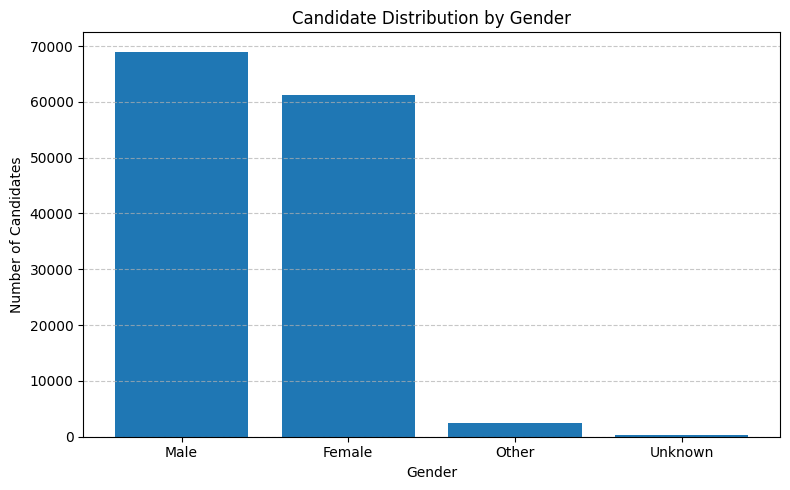

In [44]:
plot_distribution_bar(
    gender_counts_df,
    x_col="Gender",
    y_col="count",
    x_label="Gender",
    y_label="Number of Candidates",
    title="Candidate Distribution by Gender"
)

In [45]:
df_category_with_gender = get_skilltype_gender_share(df_skills_with_gender)
df_category_with_gender

Skill_Type,count_male,Skill_Type_right,count_female,count_total,perc_female,perc_male,count_diff,perc_diff
str,u32,str,u32,u32,f64,f64,i64,f64
"""Professional_Skill""",35936,"""Professional_Skill""",32767,68703,47.7,52.3,3169,4.6
"""Job_title""",12414,"""Job_title""",11161,23575,47.3,52.7,1253,5.4
"""IT_Skill""",12400,"""IT_Skill""",10077,22477,44.8,55.2,2323,10.4
"""Language_Skill""",6849,"""Language_Skill""",6304,13153,47.9,52.1,545,4.2
"""DRIVERSLIC""",1409,"""DRIVERSLIC""",968,2377,40.7,59.3,441,18.6


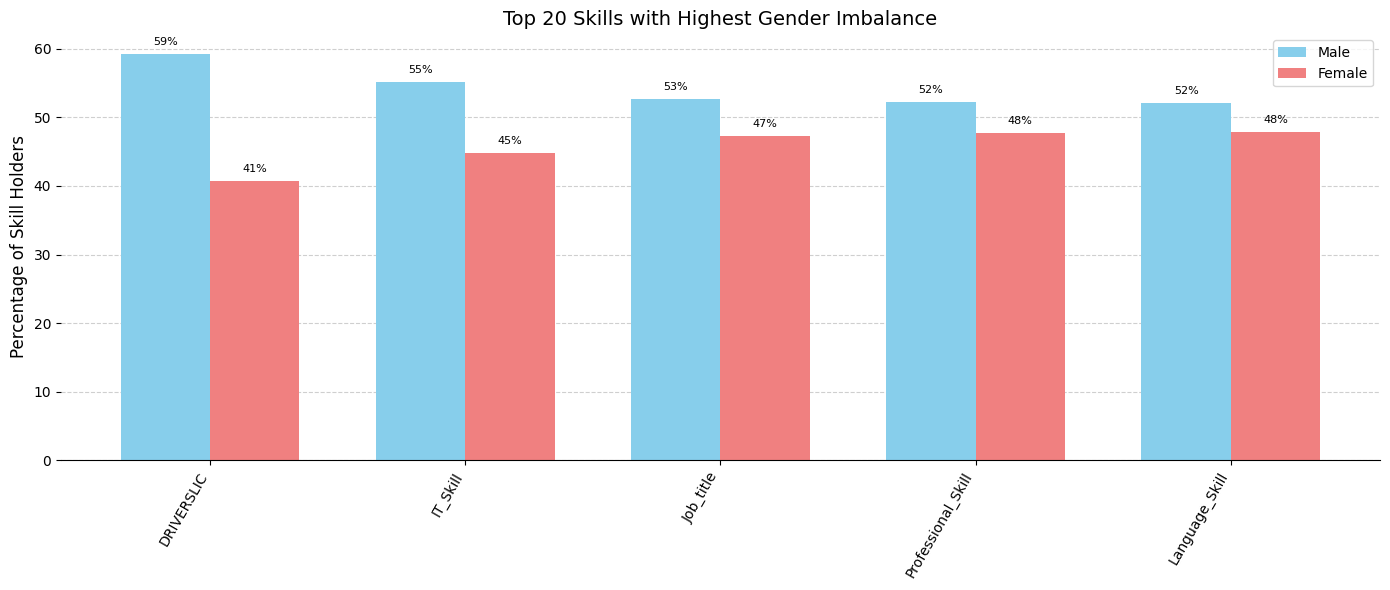

In [46]:
plot_gender_bias_skills_bar(df_category_with_gender,"Skill_Type","perc_male","perc_female","perc_diff")

In [47]:
skill_distribution_df = get_skill_distribution_by_gender(df_skills_with_gender)
skill_distribution_df

Gender,Skill,count,total_skills,percentage
str,str,u32,u32,f64
"""Female""","""Italian""",2950,61277,4.814204
"""Female""","""English""",1498,61277,2.444637
"""Female""","""Microsoft Office""",1459,61277,2.380991
"""Female""","""Cleaning of Buildings and Prem…",934,61277,1.524226
"""Female""","""Microsoft Word""",843,61277,1.37572
…,…,…,…,…
"""Unknown""","""Java Message Service (JMS)""",1,294,0.340136
"""Unknown""","""Materials Technology""",1,294,0.340136
"""Unknown""","""Complaints Management""",1,294,0.340136


In [49]:
df_gender_bias = get_skill_gender_share(df_skills_with_gender)
df_gender_bias = df_gender_bias.drop(["Skill_Type_right","Skill_right"])
df_gender_bias

Skill,Skill_Type,count_male,count_female,count_total,perc_female,perc_male,perc_diff,count_diff,bias_strength
str,str,u32,u32,u32,f64,f64,f64,i64,f64
"""Pardot B2B Marketing Automatio…","""IT_Skill""",1,0,1,0.0,100.0,100.0,1,0.693147
"""Technical Skills""","""Professional_Skill""",9,10,19,52.6,47.4,-5.2,-1,0.15767
"""Game Engine""","""IT_Skill""",1,0,1,0.0,100.0,100.0,1,0.693147
"""Obstetrics""","""Professional_Skill""",1,0,1,0.0,100.0,100.0,1,0.693147
"""Self-Employed (m/f)""","""Job_title""",15,7,22,31.8,68.2,36.4,8,1.14018
…,…,…,…,…,…,…,…,…,…
null,null,0,1,1,100.0,0.0,-100.0,-1,0.693147
null,null,0,1,1,100.0,0.0,-100.0,-1,0.693147
null,null,0,1,1,100.0,0.0,-100.0,-1,0.693147


In [50]:
df_gender_bias.sort(pl.col("bias_strength"), descending=True).head(20)

Skill,Skill_Type,count_male,count_female,count_total,perc_female,perc_male,perc_diff,count_diff,bias_strength
str,str,u32,u32,u32,f64,f64,f64,i64,f64
"""Forklift Trucks""","""Professional_Skill""",684,101,785,12.9,87.1,74.2,583,4.951383
"""Baby-Sitter (m/f)""","""Job_title""",4,163,167,97.6,2.4,-95.2,-159,4.878505
"""Programmable Logic Controllers""","""Professional_Skill""",254,18,272,6.6,93.4,86.8,236,4.867042
"""Construction Worker (m/f)""","""Job_title""",108,0,108,0.0,100.0,100.0,108,4.691348
"""Electrical Installations""","""Professional_Skill""",212,16,228,7.0,93.0,86.0,196,4.671094
…,…,…,…,…,…,…,…,…,…
"""Hydraulics""","""Professional_Skill""",133,13,146,8.9,91.1,82.2,120,4.101725
"""Warehouse Employee (m/f)""","""Job_title""",503,113,616,18.3,81.7,63.4,390,4.067693
"""Car Mechanic (m/f)""","""Job_title""",64,1,65,1.5,98.5,97.0,63,4.060742


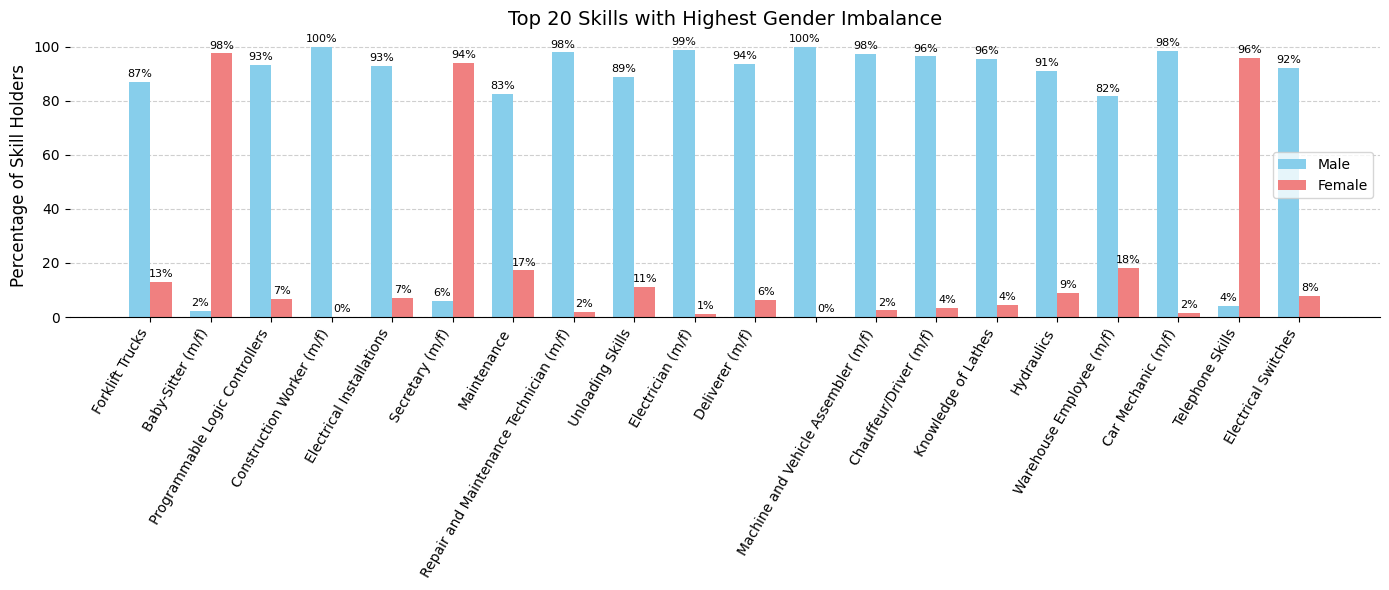

In [51]:
plot_gender_bias_skills_bar(df_gender_bias, "Skill","perc_male","perc_female","bias_strength", top_n=20)

In [52]:
from datasets import load_dataset

train_dataset = load_dataset("LabHC/bias_in_bios", split='train')
df_train = train_dataset.to_pandas()
print(df_train.head())

                                           hard_text  profession  gender
0  He is also the project lead of and major contr...          21       0
1  She is able to assess, diagnose and treat mino...          13       1
2  Prior to law school, Brittni graduated magna c...           2       1
3  He regularly contributes to India’s First Onli...          11       0
4  He completed his medical degree at Northwester...          21       0


In [53]:
print(df_train.columns)

Index(['hard_text', 'profession', 'gender'], dtype='object')


In [54]:
df = df_gender_bias.sort("bias_strength", descending=True).head(30)
df

Skill,Skill_Type,count_male,count_female,count_total,perc_female,perc_male,perc_diff,count_diff,bias_strength
str,str,u32,u32,u32,f64,f64,f64,i64,f64
"""Forklift Trucks""","""Professional_Skill""",684,101,785,12.9,87.1,74.2,583,4.951383
"""Baby-Sitter (m/f)""","""Job_title""",4,163,167,97.6,2.4,-95.2,-159,4.878505
"""Programmable Logic Controllers""","""Professional_Skill""",254,18,272,6.6,93.4,86.8,236,4.867042
"""Construction Worker (m/f)""","""Job_title""",108,0,108,0.0,100.0,100.0,108,4.691348
"""Electrical Installations""","""Professional_Skill""",212,16,228,7.0,93.0,86.0,196,4.671094
…,…,…,…,…,…,…,…,…,…
"""Credit Collections""","""Professional_Skill""",10,99,109,90.8,9.2,-81.6,-89,3.838007
"""Bricklayer (m/f)""","""Job_title""",44,0,44,0.0,100.0,100.0,44,3.806662
"""Carpenter (m/f)""","""Job_title""",55,2,57,3.5,96.5,93.0,53,3.7755


In [60]:
job_df = df.filter(pl.col("Skill_Type") == "Job_title")
job_df

Skill,Skill_Type,count_male,count_female,count_total,perc_female,perc_male,perc_diff,count_diff,bias_strength
str,str,u32,u32,u32,f64,f64,f64,i64,f64
"""Baby-Sitter (m/f)""","""Job_title""",4,163,167,97.6,2.4,-95.2,-159,4.878505
"""Construction Worker (m/f)""","""Job_title""",108,0,108,0.0,100.0,100.0,108,4.691348
"""Secretary (m/f)""","""Job_title""",11,177,188,94.1,5.9,-88.2,-166,4.628351
"""Repair and Maintenance Technic…","""Job_title""",96,2,98,2.0,98.0,96.0,94,4.407564
"""Electrician (m/f)""","""Job_title""",80,1,81,1.2,98.8,97.6,79,4.297911
…,…,…,…,…,…,…,…,…,…
"""Car Mechanic (m/f)""","""Job_title""",64,1,65,1.5,98.5,97.0,63,4.060742
"""Plumber (m/f)""","""Job_title""",46,0,46,0.0,100.0,100.0,46,3.850148
"""Bricklayer (m/f)""","""Job_title""",44,0,44,0.0,100.0,100.0,44,3.806662


In [ ]:
job_links = pl.Series(JOB_LINKS)
job_df = job_df.with_columns(job_links.alias("job_links"))

In [ ]:
perc_male_zippia, perc_female_zippia = [], []
for job_link in JOB_LINKS:
    male, female = extract_gender_from_zippia(job_link)
    perc_male_zippia.append(male)
    perc_female_zippia.append(female)


perc_male_zippia = pl.Series(perc_male_zippia)
perc_female_zippia = pl.Series(perc_female_zippia)
job_df = job